# Data Extraction and Exploration

## Imports

In [90]:
from collections import Counter

import numpy as np
import pandas as pd

import tensorflow as tf

import tensorflow_datasets as tfds

In [83]:
%matplotlib inline

import matplotlib as mpl
from matplotlib import pyplot as plt

In [63]:
mpl.rcParams["figure.figsize"] = (12, 8)
mpl.rcParams["axes.labelsize"] = "large"
mpl.rcParams['xtick.labelsize'] = 'large'
mpl.rcParams["xtick.labelsize"] = "large"
# mpl.rcParams

In [64]:
import seaborn as sns

## 1. Data (IMDB)

### Load IMDB Dataset

* https://www.tensorflow.org/tutorials/keras/text_classification_with_hub
* about split: https://www.tensorflow.org/datasets/splits

In [24]:
# tfds.load?

In [4]:
# Split the training set into 60% and 40%, so we'll end up with 15,000 examples
# for training, 10,000 examples for validation and 25,000 examples for testing.
train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews", 
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True,
    ret)

# train, 60% of 25,000
# validation 40% of 25,000
# test : 25,000

Just the first 10 elements.

In [6]:
train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))

In [8]:
train_labels_batch

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0])>

In [10]:
train_examples_batch.shape, train_labels_batch.shape

(TensorShape([10]), TensorShape([10]))

Turn the TensorFlow into a numpy array

In [16]:
a = tfds.as_numpy(train_examples_batch)

In [18]:
a[0]

b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."

### Shapes

* train set: an array/tensor of 15,000 rows of text, labels are an array of integers (0 and 1)
* validation set : an array/tensor 10,000 rows of text
* test set: an array/tensor of 25,000 rows of text

## 2. Word Index

See https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb/get_word_index

A dict of 88,584 unique words. Values are unique index.

In [12]:
word_index = tf.keras.datasets.imdb.get_word_index()

1646592/1641221 [==============================] - 1s 0us/step


In [20]:
len(word_index)

88584

In [23]:
word_index["jazz"], word_index["music"], word_index["love"]

(3979, 225, 116)

### 3. Data Structure

**Load data with Keras**

https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb/load_data

In [ ]:
# as numpy arrays
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data?

In [42]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(
        path='imdb.npz', num_words=None, skip_top=0, maxlen=None, seed=113)

In [43]:
# 25,000 elements which are a list of int (index of words)
x_train.shape, x_train.dtype

((25000,), dtype('O'))

In [44]:
# 25,000 integers (0 and 1)
y_train.shape, y_train.dtype, y_train[:3]

((25000,), dtype('int64'), array([1, 0, 0]))

In [45]:
y_test.shape

(25000,)

## 4. Identify Positive Reviews in the Dataset

In [56]:
# list of index of positive reviews
index_positive_train = np.arange(y_train.shape[0], dtype=np.int)[y_train==1]

In [55]:
len(index_positive_train), index_positive_train[:5]

(12500, array([ 0,  3,  6,  8, 10], dtype=int32))

In [57]:
# list of index of negative reviews
index_negative_train = np.arange(y_train.shape[0], dtype=np.int)[y_train==0]

In [58]:
len(index_negative_train), index_negative_train[:5]

(12500, array([1, 2, 4, 5, 7]))

## 5. Distribution

<AxesSubplot:>

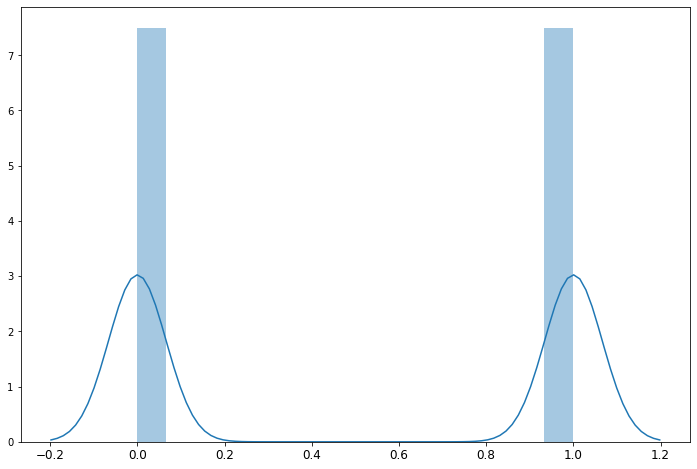

In [65]:
sns.distplot(y_train)

In [69]:
print("* {}% of pos".format(y_train.sum() / len(y_train) * 100))
print("* {}% of neg".format((y_train==0).sum() / len(y_train) * 100))

* 50.0% of pos
* 50.0% of neg


It's a balanced dataset!

### Find the distribution of word count in positive and negative reviews

Word count by review: the length of the review.

In [91]:
len(x_train[7])

562

In [92]:
# number of words for each positive review
word_count_positive = [len(x_train[idx]) for idx in index_positive_train]
pos_counter = Counter(word_count_positive)

In [95]:
# most frequent length of words
pos_counter.most_common(n=5)

[(125, 95), (122, 92), (132, 91), (127, 89), (130, 87)]

In [97]:
pos_counter.most_common(n=1)[0]

(125, 95)

In [93]:
# number of words in the positive reviews (train set)
np.sum(word_count_positive)

3019537

In [98]:
# number of words for each negative review
word_count_negative = [len(x_train[idx]) for idx in index_negative_train]
neg_counter = Counter(word_count_negative)

In [99]:
# most frequent length of words
neg_counter.most_common(n=5)

[(132, 105), (130, 104), (128, 99), (125, 99), (133, 96)]

In [100]:
# number of words in the negative reviews
np.sum([len(x_train[idx]) for idx in index_negative_train])

2948304

There are a greater number of words for positive reviews that the number of words in negative reviews.

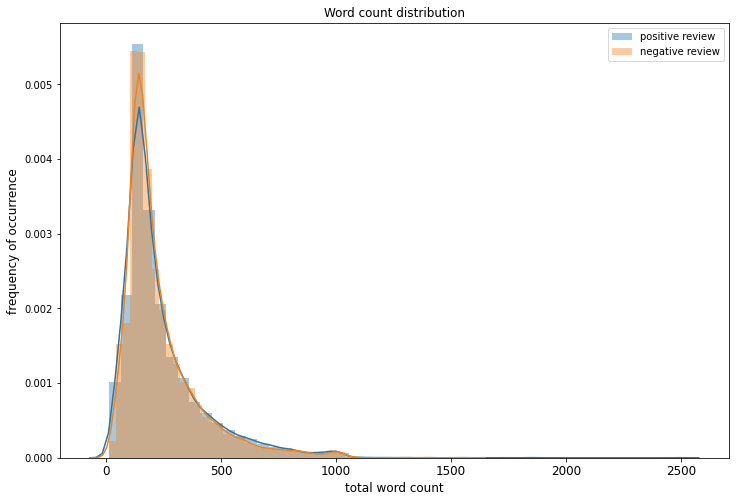

In [104]:
# word count distribution for the positive reviews
f, ax = plt.subplots(figsize=(12, 8))
sns.distplot(word_count_positive, label="positive review", ax=ax)
sns.distplot(word_count_negative, label="negative review", ax=ax)
ax.set(title="Word count distribution", ylabel="frequency of occurrence", xlabel="total word count")
ax.legend()